<a href="https://colab.research.google.com/github/Emilyjane994/High-throughput-repertoire-profiling-of-TCR-sequencing-in-IBM-T-LGL/blob/main/Frequency_plots_for_TRBV_TRBJ_pairing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [22]:
%cd /content/gdrive/MyDrive/TCR_paper

/content/gdrive/MyDrive/TCR_paper


##Healthy Controls

In [ ]:
import pandas as pd

# Load additional CSV files for the healthy control cohort
hc_file_paths = ['H1.csv','H2.csv','H3.csv','H4.csv','H5.csv','H6.csv','H7.csv','H8.csv','H9.csv','H10.csv','H11.csv','H12.csv','H13.csv']

# Step 3: Load each CSV file and store DataFrames in a list
dataframes = [pd.read_csv(file_path) for file_path in hc_file_paths]


# Step 4: (Optional) Combine all DataFrames into a single DataFrame
combined_dataframe = pd.concat(dataframes, ignore_index=True)

In [ ]:
combined_dataframe

,Sample,cloneId,readCount,readFraction,Frequency,TRBV,TRBJ,CDR3B,Length CDR3
0,H1,0.0,7625,0.150531,15.05,TRBV27,TRBJ2-2,CASSSKGQGAIGELFF,16
1,H1,1.0,5590,0.110357,11.04,TRBV28,TRBJ1-5,CASSSFGQPQHF,12
2,H1,2.0,5348,0.105579,10.56,TRBV14,TRBJ2-7,CASSGRRTYEQYF,13
3,H1,3.0,4630,0.091404,9.14,TRBV7-9,TRBJ1-4,CASSHPGEKLFF,12
4,H1,4.0,3480,0.068701,6.87,TRBV6-5,TRBJ2-7,CATSEGDYEQYF,12
...,...,...,...,...,...,...,...,...,...
19062,H13,72.0,4,0.005602,0.56,TRBV27,TRBJ1-2,CASRPSTGTYGYTF,14
19063,H13,73.0,4,0.005602,0.56,TRBV10-1,TRBJ1-1,CASSELGQ_PTNTEAFF,17
19064,H13,74.0,4,0.005602,0.56,TRBV20-1,TRBJ1-1,CSARDGRSPNTEAFF,15
19065,H13,75.0,4,0.005602,0.56,TRBV29-1,TRBJ2-1,CSAPGGVAPGEQFF,14


In [ ]:
# Create a pivot table to organize the total read counts into a matrix of TRBV (rows) by TRBJ (columns)
read_count_matrix = combined_dataframe.pivot_table(index='TRBV', columns='TRBJ', values='readCount', aggfunc='sum', fill_value=0)

read_count_matrix


In [45]:
# Transform the frequency matrix back into a long format dataframe
read_count_matrix_long = read_count_matrix.reset_index().melt(id_vars='TRBV', var_name='TRBJ', value_name='count')

In [46]:
read_count_matrix_long

,TRBV,TRBJ,count
0,TRBV10-1,TRBJ1-1,430
1,TRBV10-2,TRBJ1-1,890
2,TRBV10-3,TRBJ1-1,812
3,TRBV11-1,TRBJ1-1,1
4,TRBV11-2,TRBJ1-1,122
...,...,...,...
671,TRBV7-6,TRBJ2-7,163
672,TRBV7-7,TRBJ2-7,93
673,TRBV7-8,TRBJ2-7,118
674,TRBV7-9,TRBJ2-7,936


In [47]:
# Assuming 'combined_dataframe' is your DataFrame
file_path = '/content/gdrive/MyDrive/TCR_paper/combined_data_HC_totalcounts.csv'
read_count_matrix_long.to_csv(file_path, index=False)


In [ ]:
# Calculate the frequency (%) of each TRBV-TRBJ pairing based on the total readCount
# First, add a new column to the combined_dataframe for the frequency of each pairing
combined_dataframe['PairingFrequency'] = (combined_dataframe['readCount'] / total_read_count) * 100

# Create a pivot table to organize these frequencies into a matrix of TRBV (rows) by TRBJ (columns)
frequency_matrix = combined_dataframe.pivot_table(index='TRBV', columns='TRBJ', values='PairingFrequency', aggfunc='sum', fill_value=0)

frequency_matrix


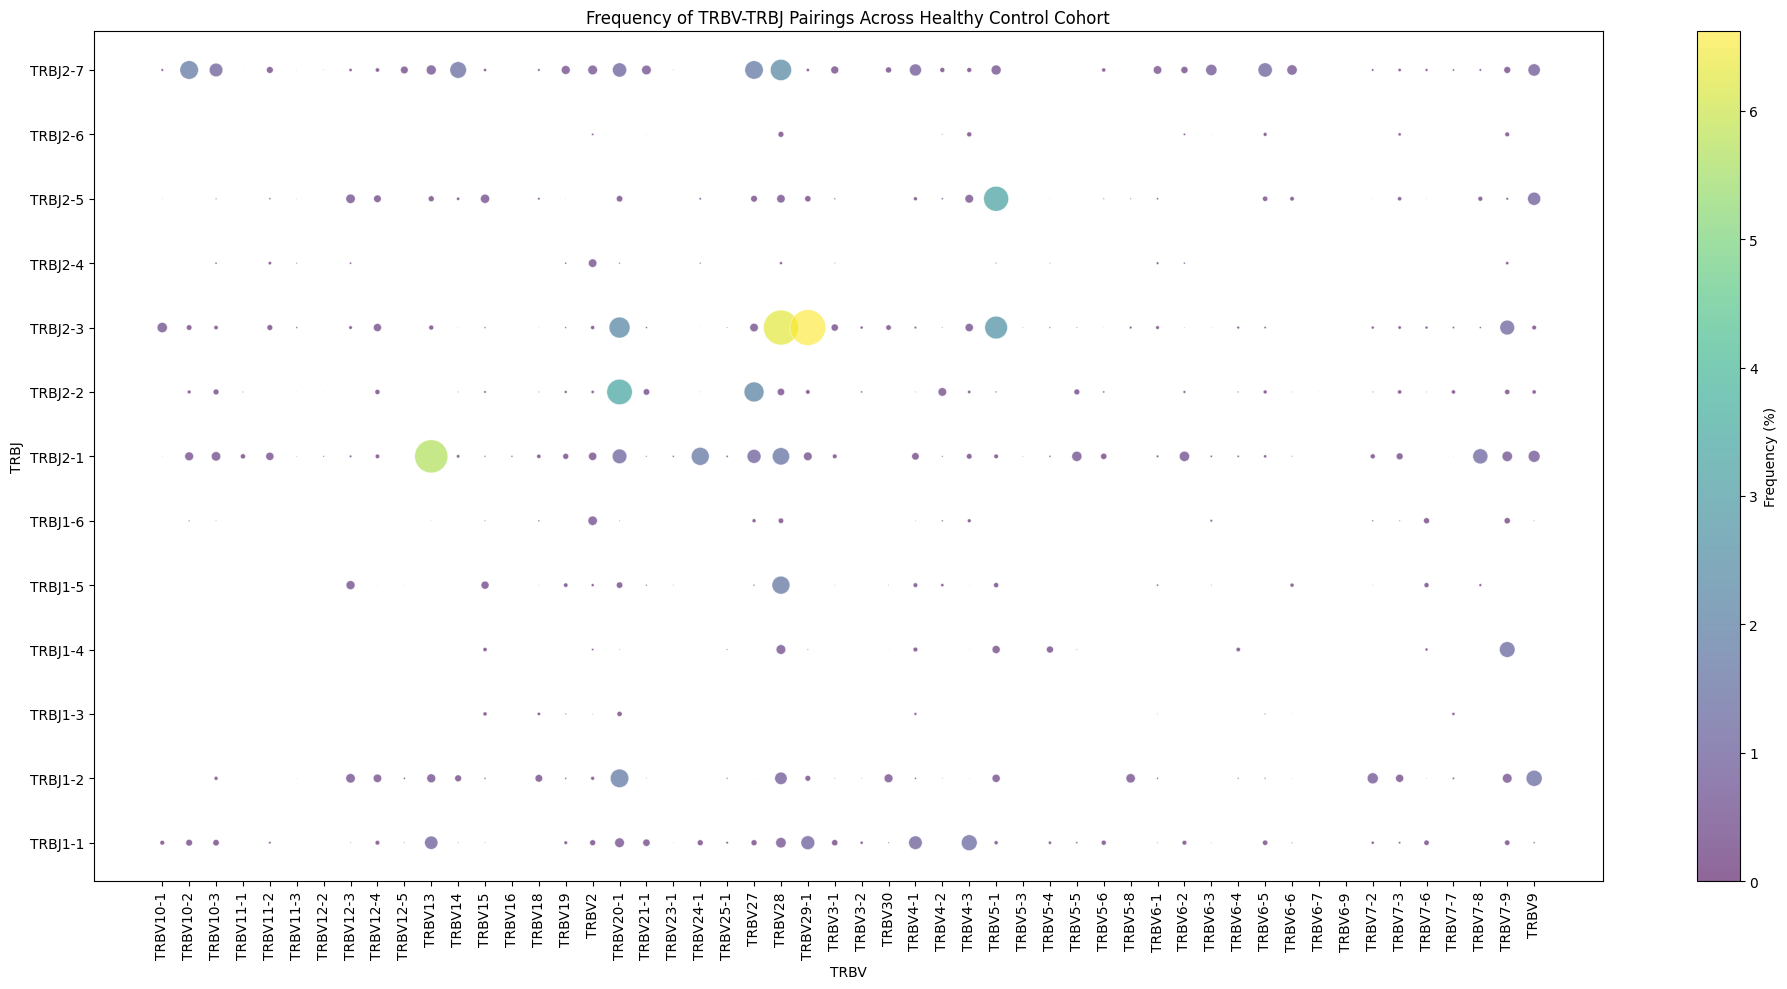

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Transform the frequency matrix back into a long format dataframe
frequency_matrix_long = frequency_matrix.reset_index().melt(id_vars='TRBV', var_name='TRBJ', value_name='Frequency')

# Plotting the frequencies of TRBV-TRBJ pairs as a scatter plot
plt.figure(figsize=(20, 10))
scatter = plt.scatter(frequency_matrix_long['TRBV'], frequency_matrix_long['TRBJ'],
                      s=frequency_matrix_long['Frequency']*100,  # Adjust size multiplier as needed
                      c=frequency_matrix_long['Frequency'],  # Color intensity
                      cmap='viridis',  # Colormap
                      alpha=0.6,  # Transparency
                      edgecolors='w',  # White edge color for better visibility
                      linewidth=0.5)  # Edge line width

plt.title('Frequency of TRBV-TRBJ Pairings Across Healthy Control Cohort')
plt.xlabel('TRBV')
plt.ylabel('TRBJ')

# Create a colorbar with a label for the color scale
plt.colorbar(scatter, label='Frequency (%)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Use tight_layout to adjust the spacing
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
frequency_matrix_long

In [14]:
# Assuming 'combined_dataframe' is your DataFrame
file_path = '/content/gdrive/MyDrive/TCR_paper/combined_dataframe.csv'
combined_dataframe.to_csv(file_path, index=False)


In [ ]:
# Filter the DataFrame for rows with the specific TRBV and TRBJ pairing
specific_pairing = combined_dataframe[(combined_dataframe['TRBV'] == 'TRBV20-1') & (combined_dataframe['TRBJ'] == 'TRBJ2-7')]

# Sum up the 'Frequency' values for the filtered rows (if you expect multiple rows for the same pairing)
total_frequency = specific_pairing['Frequency'].sum()

# Display the total frequency
print("Total frequency of TRBV20-1 and TRBJ2-7 pairing:", total_frequency)


Total frequency of TRBV20-1 and TRBJ2-7 pairing: 61.09


##IBM Patients

In [23]:
import pandas as pd

# Load additional CSV files for the healthy control cohort
IBM_file_paths = ['IBM1.csv','IBM2.csv','IBM3.csv','IBM4.csv','IBM5.csv','IBM6.csv','IBM7.csv','IBM8.csv','IBM9.csv','IBM10.csv','IBM11.csv','IBM12.csv','IBM13.csv']

# Step 3: Load each CSV file and store DataFrames in a list
IBM_dataframes = [pd.read_csv(file_path) for file_path in IBM_file_paths]


# Step 4: (Optional) Combine all DataFrames into a single DataFrame
IBM_combined_dataframe = pd.concat(IBM_dataframes, ignore_index=True)

In [ ]:
# Create a pivot table to organize the total read counts into a matrix of TRBV (rows) by TRBJ (columns)
read_count_matrix_IBM = IBM_combined_dataframe.pivot_table(index='TRBV', columns='TRBJ', values='readCount', aggfunc='sum', fill_value=0)

read_count_matrix_IBM

In [50]:
# Calculate the total sum of the 'readCount' column from the original combined_dataframe
total_read_count_IBM = IBM_combined_dataframe['readCount'].sum()

total_read_count_IBM

419798.0

In [52]:
# Transform the frequency matrix back into a long format dataframe
read_count_matrix_long_IBM = read_count_matrix_IBM.reset_index().melt(id_vars='TRBV', var_name='TRBJ', value_name='count')
read_count_matrix_long_IBM


,TRBV,TRBJ,count
0,TRBV1,TRBJ1-1,0
1,TRBV10-1,TRBJ1-1,12
2,TRBV10-2,TRBJ1-1,4
3,TRBV10-3,TRBJ1-1,3
4,TRBV11-1,TRBJ1-1,0
...,...,...,...
736,TRBV7-6,TRBJ2-7,748
737,TRBV7-7,TRBJ2-7,19
738,TRBV7-8,TRBJ2-7,233
739,TRBV7-9,TRBJ2-7,2343


In [53]:
# Assuming 'combined_dataframe' is your DataFrame
file_path = '/content/gdrive/MyDrive/TCR_paper/combined_data_IBM_totalcounts.csv'
read_count_matrix_long_IBM .to_csv(file_path, index=False)


In [ ]:
# Calculate the frequency (%) of each TRBV-TRBJ pairing based on the total readCount
# First, add a new column to the combined_dataframe for the frequency of each pairing
IBM_combined_dataframe['PairingFrequency'] = (IBM_combined_dataframe['readCount'] / total_read_count) * 100

# Create a pivot table to organize these frequencies into a matrix of TRBV (rows) by TRBJ (columns)
frequency_matrix_IBM = IBM_combined_dataframe.pivot_table(index='TRBV', columns='TRBJ', values='PairingFrequency', aggfunc='sum', fill_value=0)

frequency_matrix_IBM

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Transform the frequency matrix back into a long format dataframe
frequency_matrix_long_IBM= frequency_matrix_IBM.reset_index().melt(id_vars='TRBV', var_name='TRBJ', value_name='Frequency')

# Plotting the frequencies of TRBV-TRBJ pairs as a scatter plot
plt.figure(figsize=(20, 10))
scatter = plt.scatter(frequency_matrix_long_IBM['TRBV'], frequency_matrix_long_IBM['TRBJ'],
                      s=frequency_matrix_long_IBM['Frequency']*100,  # Adjust size multiplier as needed
                      c=frequency_matrix_long_IBM['Frequency'],  # Color intensity
                      cmap='viridis',  # Colormap
                      alpha=0.6,  # Transparency
                      edgecolors='w',  # White edge color for better visibility
                      linewidth=0.5)  # Edge line width

plt.title('Frequency of TRBV-TRBJ Pairings Across IBM T-LGL HIGH Cohort')
plt.xlabel('TRBV')
plt.ylabel('TRBJ')

# Create a colorbar with a label for the color scale
plt.colorbar(scatter, label='Frequency (%)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Use tight_layout to adjust the spacing
plt.tight_layout()

# Show the plot
plt.show()